## Image Classification using Logistic Regression

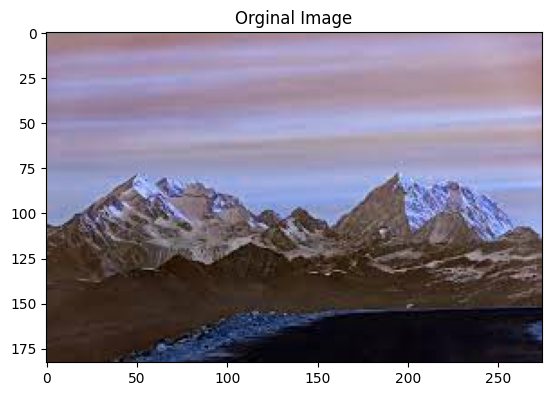

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from PIL import Image
from sklearn.metrics import classification_report
import cv2

# Load the user-provided image
image_path = '/content/mountain.jpg'
img = Image.open(image_path)
# Reading the image
image = cv2.imread(image_path)
# Ploting / Showing the image
plt.imshow(image)
plt.title("Orginal Image")
plt.show()

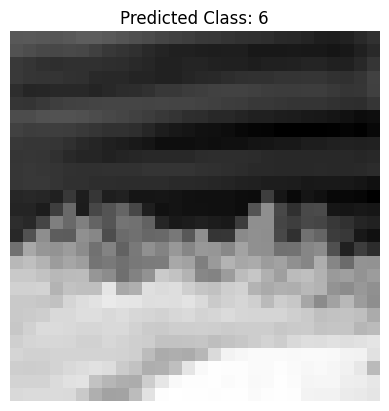

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         4

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [2]:
img = img.convert('L')  # Convert to grayscale if not already
img = img.resize((28, 28))  # Resize the image to 28x28 pixels
user_image = np.array(img).reshape(1, -1)  # Reshape into a 1D array

# In this example, we simulate a dataset with 10 classes (0-9)
X_train = np.random.rand(100, 784)  # 100 samples of 28x28 pixel images
y_train = np.random.choice(range(10), size=100)  # Random labels (0-9)

# Instantiate the logistic regression model
logistic_regression_model = LogisticRegression(solver='saga', max_iter=1000)

# Fit the model on the training data
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the user's image
predicted_class = logistic_regression_model.predict(user_image)

# Display the user's image
plt.imshow(np.array(img), cmap=plt.cm.binary, interpolation='nearest')
plt.title(f'Predicted Class: {predicted_class[0]}')
plt.axis('off')
plt.show()

# Classification report
y_prediction = logistic_regression_model.predict(X_train)
classification_rep = classification_report(y_train, y_prediction)
print("Classification Report on Training Data:")
print(classification_rep)

## Naive Bayes

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)


Prediction is: mountain


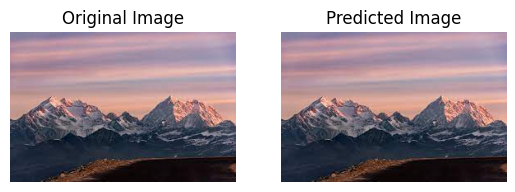

Classification Report:
               precision    recall  f1-score   support

    mountain       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [3]:
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import os

# Load and preprocess the user-provided image
image_path = '/content/mountain.jpg' 
img_data = np.asarray(Image.open(image_path))

# Converting image into a 1-dimensional vector
img_vector = img_data.ravel()

# Standardizing the image vector (mean = 0, variance = 1)
img_vector = (img_vector - np.mean(img_vector)) / np.std(img_vector)

# Automatically detect the label from the image's filename
image_filename = os.path.basename(image_path)
y_single = image_filename.split('.')[0]  # Extract the label from the filename

# Training the classifier on your single image and label
clf = GaussianNB()  # Gaussian Naive Bayes
clf.fit([img_vector], [y_single])

# Predict on the user's image
y_predict = clf.predict([img_vector])
print('Prediction is:', y_predict[0])

# Display the original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_data)
plt.axis('off')

# Load and display the predicted image based on the label
predicted_image_path = f'{y_predict[0]}.jpg'  # Assumes the predicted image filename matches the label
if os.path.isfile(predicted_image_path):
    predicted_img_data = np.asarray(Image.open(predicted_image_path))
    plt.subplot(1, 2, 2)
    plt.title("Predicted Image")
    plt.imshow(predicted_img_data)
    plt.axis('off')
else:
    print(f'Predicted image file not found for label: {y_predict[0]}')

# Show the original and predicted images
plt.show()

# Generate a classification report
target_names = [y_predict[0]]  # Replace with your label names
classification_rep = classification_report([y_single], [y_predict[0]], target_names=target_names)
print("Classification Report:\n", classification_rep)

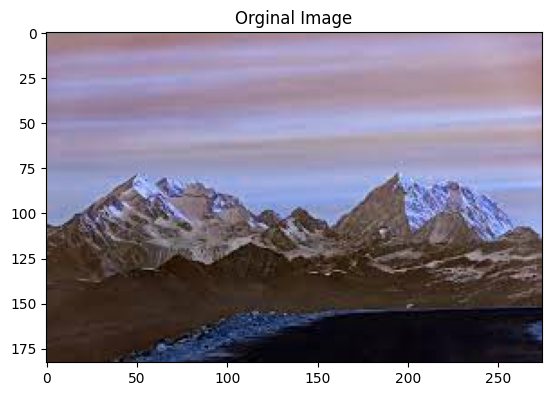

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/mountain.jpg')
im = image / 255.0
# Ploting / Showing the image
plt.imshow(image)
plt.title("Orginal Image")
plt.show()

## K- means Clustering

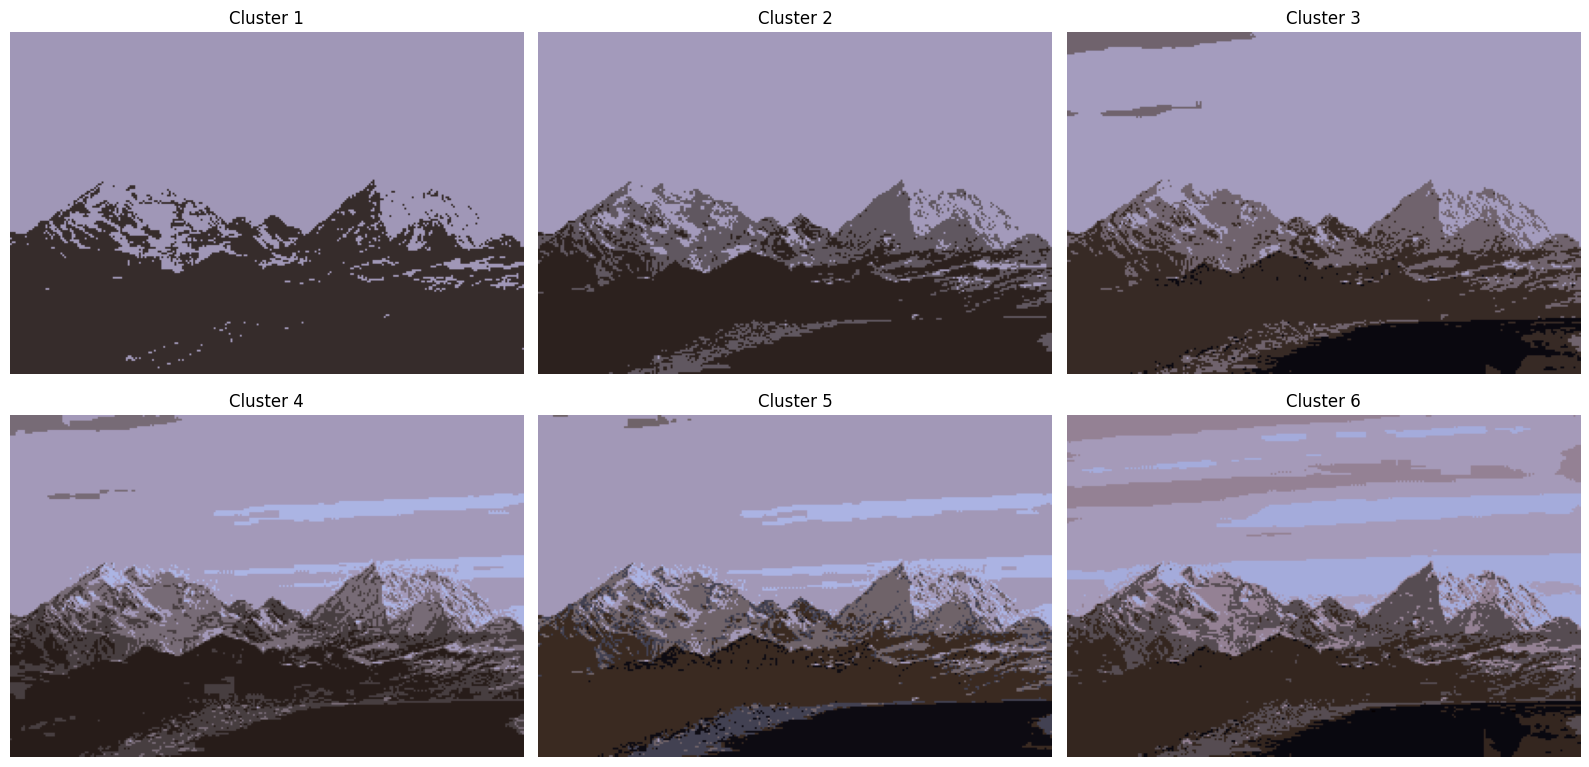

In [5]:
# Reshape the image
pic = im.reshape((-1, 3)).astype(np.float32)  # Flatten and convert to 32-bit float

# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(16, 8))

count = 1
for i in range(2):
    for j in range(3):
        # Perform k-means clustering
        kmeans = cv2.kmeans(pic, count + 1, None, criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2), attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS)
        cluster_centers = kmeans[2]

        # Assign cluster center values to pixels
        labels = kmeans[1]
        pic_print = cluster_centers[labels.flatten()]
        clustered_pic = pic_print.reshape(im.shape[0], im.shape[1], im.shape[2])

        # Display clustered image
        ax[i][j].set_title('Cluster ' + str(count))
        ax[i][j].imshow(clustered_pic)
        ax[i][j].axis('off')

        count += 1

plt.tight_layout()
plt.show()

## DBSCAN

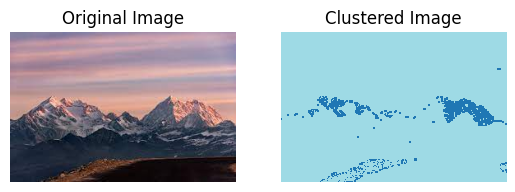

In [6]:
import numpy as np
from sklearn.cluster import DBSCAN
from PIL import Image
from matplotlib import pyplot

# Load the user-provided image
image_path = '/content/mountain.jpg'  
original_image = Image.open(image_path)

# Convert the image to a NumPy array
img_array = np.array(original_image)

# Flatten the array to create a list of pixel values
pixels = img_array.reshape(-1, 3)  # Assuming it's a color image (RGB)

# Create a DBSCAN clustering model
dbscan_model = DBSCAN(eps=10, min_samples=100)  # Adjust eps and min_samples as needed

# Fit the model to the pixel data
dbscan_model.fit(pixels)

# Get the cluster labels for each pixel
cluster_labels = dbscan_model.labels_

# Reshape the cluster labels back into the shape of the original image
clustered_image = cluster_labels.reshape(img_array.shape[0], img_array.shape[1])

# Create a colormap for visualizing clusters
cmap = pyplot.get_cmap('tab20', np.max(cluster_labels) + 1)

# Display the original image
pyplot.subplot(1, 2, 1)
pyplot.imshow(original_image)
pyplot.title('Original Image')
pyplot.axis('off')

# Display the clustered image
pyplot.subplot(1, 2, 2)
pyplot.imshow(clustered_image, cmap=cmap)
pyplot.title('Clustered Image')
pyplot.axis('off')

pyplot.show()

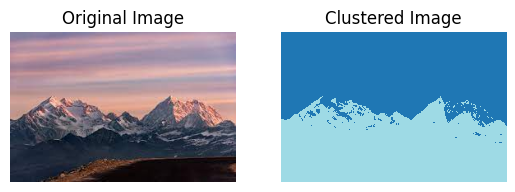

In [8]:
import numpy as np
from sklearn.mixture import GaussianMixture
from PIL import Image
import matplotlib.pyplot as plt

# Load the user-provided image
image_path = '/content/mountain.jpg' 
original_image = Image.open(image_path)

# Convert the image to a NumPy array
img_array = np.array(original_image)

# Flatten the array to create a list of pixel values
pixels = img_array.reshape(-1, 3)  # Assuming it's a color image (RGB)

# Create a Gaussian Mixture clustering model
gmm_model = GaussianMixture(n_components=2, covariance_type='full', random_state=0)

# Fit the model to the pixel data
gmm_model.fit(pixels)

# Predict the clusters for each pixel
cluster_labels = gmm_model.predict(pixels)

# Reshape the cluster labels back into the shape of the original image
clustered_image = cluster_labels.reshape(img_array.shape[0], img_array.shape[1])

# Create a colormap for visualizing clusters
cmap = plt.get_cmap('tab20', np.max(cluster_labels) + 1)

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# Display the clustered image
plt.subplot(1, 2, 2)
plt.imshow(clustered_image, cmap=cmap)
plt.title('Clustered Image')
plt.axis('off')
plt.show()